<a href="https://colab.research.google.com/github/ffer200395/ML-course/blob/main/1_Librer%C3%ADas_para_Data_science_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sn

# NumPy

In [ ]:
# Creamos un array de dimensión 1 que contenga valores del 1 al 5
arr_1d = np.array([1,2,3,4,5])
arr_1d

array([1, 2, 3, 4, 5])

In [ ]:
# Creamos un array de dimensión 1 que contenga valores del 1 al 5 usando la función nativa range
arr_1d = np.array(range(1,6))
arr_1d

array([1, 2, 3, 4, 5])

In [ ]:
for i in range(1,6):
  print(i)

1
2
3
4
5


In [ ]:
# Comprobamos el tipo de dato del array creado
type(arr_1d)

numpy.ndarray

In [ ]:
# Tipo de dato que contiene el np.array
arr_1d.dtype

dtype('int64')

In [ ]:
# Comprobamos la dimensión
arr_1d.ndim

1

In [ ]:
arr_1d.shape

(5,)

In [ ]:
# Printar el primer y último elemento del array
print(arr_1d[0],arr_1d[-1])

1 5


In [ ]:
# Crear un array de 2 dimensiones usando las tuplas: (1,2,3), (4,5,6) y (7,8,9)
arr_2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
# Printar los elementos de la diagonal
arr_2d.diagonal()

array([1, 5, 9])

In [ ]:
# Printar el primer y último elemento de la matriz
print(arr_2d[0,0],arr_2d[-1,-1])

1 9


In [ ]:
# Crea un array de 3 dimensiones
arr_3d = np.array([[[1,2,3]],[[4,5,6]],[[7,8,9]]])
arr_3d

array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]])

In [ ]:
# Muestra la forma
arr_3d.shape

(3, 1, 3)

In [ ]:
# Accede al elemento central
arr_3d[1,0,1]

5

In [ ]:
# Muestra los items del array que sean impares
arr_3d[arr_3d%2!=0]

array([1, 3, 5, 7, 9])

In [ ]:
# Muestra los elementos que sean pares y mayores que 5
arr_3d[(arr_3d%2==0)&(arr_3d>5)]

array([6, 8])

In [ ]:
# Eleva al cuadrado todos los elementos del array
arr_3d**2

array([[[ 1,  4,  9]],

       [[16, 25, 36]],

       [[49, 64, 81]]])

In [ ]:
np.square(arr_3d)

array([[[ 1,  4,  9]],

       [[16, 25, 36]],

       [[49, 64, 81]]])

In [ ]:
# Muestra el último elemento de cada subarray
arr_3d[:,0,-1]

array([3, 6, 9])

In [ ]:
# Muestra desde el segundo subarray en adelante
arr_3d[1:,:,:]

array([[[4, 5, 6]],

       [[7, 8, 9]]])

## Data types in numpy

In [ ]:
# Unicode string
arr_str = np.array(['a','b'])
arr_str.dtype

dtype('<U1')

In [ ]:
# Boolean
arr_bool = np.array([True, False])
arr_bool.dtype

dtype('bool')

In [ ]:
# Integer type
arr_1d.dtype

dtype('int64')

In [ ]:
# Convierte del tipo Booleano al entero
arr_casting = arr_bool.astype('int64')
print(arr_casting.dtype)
print(arr_casting)

int64
[1 0]


In [ ]:
# Convierte del tipo Float al entero
arr_dec = np.array((1.2,2.5,3.6))
print(arr_dec.dtype)
arr_dec_casting = arr_dec.astype('int64')
print(arr_dec_casting)

float64
[1 2 3]


In [ ]:
# Crea un vector de unos (enteros) de longitud 10
arr_ones = np.ones(10, dtype='int64')
arr_ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Convierte el array en una matriz de 2x5
arr_ones.reshape((2,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [ ]:
np.ones((2,5), dtype='int64')

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [ ]:
# Crea un array que contenga strings, enteros y booleanos y comprueba el tipado de los datos
arr_mix = np.array([0,1,True,False,'a','b'])
arr_mix.dtype

dtype('<U21')

In [ ]:
arr_mix[2]

'True'

# Pandas y numpy

In [ ]:
# Cargar el archivo GM_price.csv en un DataFrame
df = pd.read_csv('/content/GM_price.csv',index_col=0)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,36.470809,36.845375,36.027244,36.845375,7454400,0.0,0
2020-01-03 00:00:00-05:00,36.204669,36.391950,35.593538,35.800533,9173000,0.0,0
2020-01-06 00:00:00-05:00,35.435824,35.662534,35.287968,35.327396,8408200,0.0,0
2020-01-07 00:00:00-05:00,35.238687,35.327400,34.243134,34.647270,17556800,0.0,0
2020-01-08 00:00:00-05:00,34.538844,34.696556,33.917854,34.154423,13229400,0.0,0
...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,36.450001,37.480000,35.830002,37.009998,25537500,0.0,0
2022-10-26 00:00:00-04:00,37.360001,38.270000,37.180000,37.860001,19638600,0.0,0
2022-10-27 00:00:00-04:00,38.040001,38.639999,37.410000,38.160000,13842600,0.0,0


In [ ]:
df.loc[df.index.max(),:]

Open            3.855000e+01
High            3.966000e+01
Low             3.836000e+01
Close           3.925000e+01
Volume          1.395770e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-10-31 00:00:00-04:00, dtype: float64

In [ ]:
# Mostrar los 3 primeros registros
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,36.470809,36.845375,36.027244,36.845375,7454400,0.0,0
2020-01-03 00:00:00-05:00,36.204669,36.391950,35.593538,35.800533,9173000,0.0,0
2020-01-06 00:00:00-05:00,35.435824,35.662534,35.287968,35.327396,8408200,0.0,0


In [ ]:
# Mostrar los 3 últimos registros
df.tail(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-27 00:00:00-04:00,38.040001,38.639999,37.410000,38.160000,13842600,0.0,0
2022-10-28 00:00:00-04:00,38.200001,38.880001,38.090000,38.849998,10459800,0.0,0
2022-10-31 00:00:00-04:00,38.549999,39.660000,38.360001,39.250000,13957700,0.0,0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.0
mean,42.342644,43.020981,41.609685,42.314676,1.725879e+07,0.000658,0.0
std,12.448439,12.532659,12.314302,12.434200,7.697090e+06,0.014610,0.0
min,16.302779,18.517722,14.297357,16.761730,6.491900e+06,0.000000,0.0
25%,32.535718,32.981438,31.832322,32.358624,1.227435e+07,0.000000,0.0
50%,40.584999,41.412733,39.863986,40.577356,1.556345e+07,0.000000,0.0
75%,54.617801,55.381057,53.859531,54.490590,1.993432e+07,0.000000,0.0
max,65.370746,67.056899,62.547195,65.590248,6.766720e+07,0.380000,0.0


In [ ]:
# Obtener el último precio de cierre
df['Close'][-1]

39.25

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

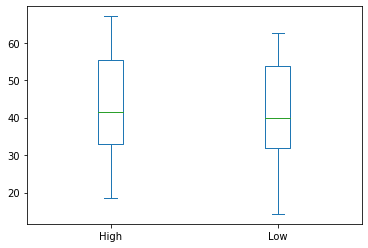

In [ ]:
# Boxplot de precios
df[['High','Low']].plot.box()

In [ ]:
# Calcular una nueva columna que sea el precio medio
df['Mean'] = np.mean(df[['High', 'Low']],axis=1)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean
Date,,,,,,,,
2020-01-02 00:00:00-05:00,36.470809,36.845375,36.027244,36.845375,7454400,0.0,0,36.436310
2020-01-03 00:00:00-05:00,36.204669,36.391950,35.593538,35.800533,9173000,0.0,0,35.992744
2020-01-06 00:00:00-05:00,35.435824,35.662534,35.287968,35.327396,8408200,0.0,0,35.475251
2020-01-07 00:00:00-05:00,35.238687,35.327400,34.243134,34.647270,17556800,0.0,0,34.785267
2020-01-08 00:00:00-05:00,34.538844,34.696556,33.917854,34.154423,13229400,0.0,0,34.307205


In [ ]:
# Mostrar los valores máximos, mínimos y medio de la columna calculada
print(df['Mean'].max(),min(df['Mean']),df['Mean'].mean())

64.75714942400646 16.651981107758544 42.31533290621754


In [ ]:
# Comprobar si existen campos vacíos
df.isnull()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean
Date,,,,,,,,
2020-01-02 00:00:00-05:00,False,False,False,False,False,False,False,False
2020-01-03 00:00:00-05:00,False,False,False,False,False,False,False,False
2020-01-06 00:00:00-05:00,False,False,False,False,False,False,False,False
2020-01-07 00:00:00-05:00,False,False,False,False,False,False,False,False
2020-01-08 00:00:00-05:00,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,False,False,False,False,False,False,False,False
2022-10-26 00:00:00-04:00,False,False,False,False,False,False,False,False
2022-10-27 00:00:00-04:00,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Mean            0
dtype: int64

In [ ]:
df.isnull().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
Mean            False
dtype: bool

In [ ]:
# Creamos una columna para el precio medio escalado teniendo en cuenta el precio máximo y mínimo
# Xsc = (X-Xmin)/(Xmax-Xmin)
df['Mean_scaled'] = (df['Mean']-df['Mean'].min())/(df['Mean'].max()-df['Mean'].min())

In [ ]:
# Muestra los valores escalados
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean,Mean_scaled
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,36.470809,36.845375,36.027244,36.845375,7454400,0.0,0,36.436310,0.411272
2020-01-03 00:00:00-05:00,36.204669,36.391950,35.593538,35.800533,9173000,0.0,0,35.992744,0.402052
2020-01-06 00:00:00-05:00,35.435824,35.662534,35.287968,35.327396,8408200,0.0,0,35.475251,0.391294
2020-01-07 00:00:00-05:00,35.238687,35.327400,34.243134,34.647270,17556800,0.0,0,34.785267,0.376951
2020-01-08 00:00:00-05:00,34.538844,34.696556,33.917854,34.154423,13229400,0.0,0,34.307205,0.367013


In [ ]:
# Comprobamos los valores mínimos y máximos de los valores escalados
print(min(df['Mean_scaled']), max(df['Mean_scaled']))

0.0 1.0


In [ ]:
# Vemos el tipo de la columna calculada


pandas.core.series.Series

In [ ]:
# Convierte la columna a un numpy series


numpy.ndarray

In [ ]:
# Creamos una matriz de precios
df['Mean'].values

array([36.43630968, 35.99274401, 35.47525063, 34.78526726, 34.30720468,
       34.31705696, 34.9725498 , 34.24806055, 34.65219598, 34.60291186,
       34.85919803, 35.06126203, 34.75076654, 34.60291248, 34.00656788,
       34.0065637 , 32.9863674 , 33.11943615, 33.33136135, 32.73501366,
       32.83851126, 33.44471606, 34.01642071, 34.32198849, 34.17905997,
       33.30671928, 33.49892835, 34.16920474, 34.95283501, 34.83947866,
       34.40577068, 33.85870917, 34.31212967, 34.49448603, 34.24806335,
       32.79415942, 31.87745923, 31.78874655, 30.78826281, 29.48714103,
       30.157417  , 30.83261981, 30.5221247 , 30.32077438, 28.92895268,
       25.07774456, 25.80608144, 26.13034265, 23.3716406 , 24.06006738,
       21.65555769, 20.49321128, 16.65198111, 16.95628628, 18.27826887,
       17.85423697, 20.089135  , 22.02471513, 21.96485116, 21.30136553,
       21.50589913, 21.33129776, 19.53539816, 18.69731263, 18.27328028,
       19.11136672, 21.41111549, 22.48366662, 24.22968157, 23.35

In [ ]:
# Mostamos la primera entrada de la matriz
print(prices[0])
# Mostamos el número de filas y columnas de nuestra matriz de precios
print(prices.shape)

[0.41127241 0.40205166 0.39129412 0.37695089 0.36701303 0.36721784
 0.38084408 0.36578355]
(707, 8)


In [ ]:
# Creamos un Dataframe con la matriz de precios, la última columna se llamará "y" el resto x_1, x_2, etc.


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8
0,0.411272,0.402052,0.391294,0.376951,0.367013,0.367218,0.380844,0.365784
1,0.402052,0.391294,0.376951,0.367013,0.367218,0.380844,0.365784,0.374185
2,0.391294,0.376951,0.367013,0.367218,0.380844,0.365784,0.374185,0.373160
3,0.376951,0.367013,0.367218,0.380844,0.365784,0.374185,0.373160,0.378488
4,0.367013,0.367218,0.380844,0.365784,0.374185,0.373160,0.378488,0.382688


In [ ]:
# Renombrar la columna x_9 como "y" y comprobar que los nombres de las columnas son como esperamos


Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'y'], dtype='object')

# Feature extraction Titanic dataset

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Eliminar columnas innecesarias
df_drop = df.drop(['PassengerId', 'Name', 'Ticket','Cabin','Embarked'],axis=1)

In [ ]:
df_drop.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Pasar variable categórica a numérica
df_dummy = pd.get_dummies(df_drop)
df_dummy.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [ ]:
# Imputar la edad
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_dummy['Age'] = imp_mean.fit_transform(df_dummy['Age'].values.reshape(-1,1))

## Feature selection (filtrado)

In [ ]:
def get_corr_vars(X,y):
  # Inicializar variable respuesta
  d_res = dict()
  # Por cada una de las columnas de la matriz X
  for col in X.columns:
    # Seleccionamos la columna sobre la cual estamos iterando
    col_values = X[col]
    # Calcular la correlación con la variable dependiente y
    corr = np.corrcoef(col_values, y)[0,1]
    # Almacenamos el nombre de la variable y su correlación con y
    d_res[col] = corr
  return d_res

X = df_dummy.loc[:, df_dummy.columns != 'Survived']
y = df_dummy['Survived']

d_corr = get_corr_vars(X,y)

In [ ]:
d_corr.items()

dict_items([('Pclass', -0.33848103596101475), ('Age', -0.06980851528714314), ('SibSp', -0.035322498885735645), ('Parch', 0.08162940708348372), ('Fare', 0.2573065223849625), ('Sex_female', 0.5433513806577555), ('Sex_male', -0.5433513806577555)])

In [ ]:
for k,v in d_corr.items():
  if np.abs(v)>0.2:
    print(k,v)

Pclass -0.33848103596101475
Fare 0.2573065223849625
Sex_female 0.5433513806577555
Sex_male -0.5433513806577555


## Wrapper method

In [ ]:
# Recusive Feature Selection (Wrapper method)
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el objeto Recursive Feature Elimination CV
rfecv_selector = RFECV(estimator=RandomForestClassifier(100), step=1, verbose=1)
rfecv_selector.fit(X, y)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator wi

RFECV(estimator=RandomForestClassifier(), verbose=1)

In [ ]:
print(X.columns)
print(rfecv_selector.ranking_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')
[1 1 2 3 1 1 1]


## Filter II

In [ ]:
# Select features according to the k highest scores. (filter)
from sklearn.feature_selection import SelectKBest, f_regression 
X_new = SelectKBest(f_regression, k='all').fit(X, y)
print(X.columns)
np.round(X_new.scores_,3)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')


array([115.031,   4.354,   1.111,   5.963,  63.031, 372.406, 372.406])

# Proceso de entrenamiento

In [ ]:
X = X[['Pclass', 'Age', 'Sex_female', 'Sex_male']]
X

,Pclass,Age,Sex_female,Sex_male
0,3,22.000000,0,1
1,1,38.000000,1,0
2,3,26.000000,1,0
3,1,35.000000,1,0
4,3,35.000000,0,1
...,...,...,...,...
886,2,27.000000,0,1
887,1,19.000000,1,0
888,3,29.699118,1,0
889,1,26.000000,0,1


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# Rompemos el dataset en los conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Versión sin pipeline
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Instanciamos y ajustamos el algoritmo knn
knn = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(X_train_sc, y_train)

In [ ]:
# Aplicar el modelo sobre el conjunto de testeo
yhat = knn_fit.predict(X_test_sc)

In [ ]:
# Medimos la exactitud sobre ambos conjuntos
print(accuracy_score(y_train, knn_fit.predict(X_train_sc)))
print(accuracy_score(y_test, yhat))

0.8525280898876404
0.8100558659217877


In [ ]:
# Versión pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8525280898876404
0.8100558659217877


In [ ]:
# Probamos con distintos algoritmos de clasificación
ls_alg = [LogisticRegression(),SVC(),RandomForestClassifier(),GaussianNB()]
for alg in ls_alg:
  pipe = Pipeline([('scaler', StandardScaler()), ('estimator', alg)])
  pipe.fit(X_train, y_train)
  print(alg)
  print(pipe.score(X_train, y_train),pipe.score(X_test, y_test))

LogisticRegression()
0.7893258426966292 0.8044692737430168
SVC()
0.8061797752808989 0.776536312849162
RandomForestClassifier()
0.8778089887640449 0.7932960893854749
GaussianNB()
0.7879213483146067 0.7821229050279329


In [ ]:
# Gridsearch CV KNN
est = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,13), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(est, parameters, verbose =3)
pipe = Pipeline([('scaler', StandardScaler()), ('estimator', gs)])
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....algorithm=auto, n_neighbors=1;, score=0.769 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=1;, score=0.776 total time=   0.0s
[CV 3/5] END .....algorithm=auto, n_neighbors=1;, score=0.761 total time=   0.0s
[CV 4/5] END .....algorithm=auto, n_neighbors=1;, score=0.739 total time=   0.0s
[CV 5/5] END .....algorithm=auto, n_neighbors=1;, score=0.739 total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=2;, score=0.776 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=2;, score=0.797 total time=   0.0s
[CV 3/5] END .....algorithm=auto, n_neighbors=2;, score=0.796 total time=   0.0s
[CV 4/5] END .....algorithm=auto, n_neighbors=2;, score=0.761 total time=   0.0s
[CV 5/5] END .....algorithm=auto, n_neighbors=2;, score=0.768 total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=3;, score=0.776 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=3

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': range(1, 13)},
                              verbose=3))])

In [ ]:
pipe[1].best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [ ]:
pipe[1].best_score_

0.8131980695360976

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8286516853932584
0.7877094972067039


In [ ]:
# Gridsearch CV KNN
est = RandomForestClassifier()
parameters = {'n_estimators':range(10,110,10)}
gs = GridSearchCV(est, parameters)
pipe = Pipeline([('scaler', StandardScaler()), ('estimator', gs)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': range(10, 110, 10)}))])

In [ ]:
pipe[1].best_estimator_

RandomForestClassifier(n_estimators=40)

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8764044943820225
0.7877094972067039


In [ ]:
# Voting Classifier
clf = VotingClassifier(estimators=[('lr', KNeighborsClassifier(n_neighbors=3)), ('rf', RandomForestClassifier(n_estimators=40)), ('gnb', GaussianNB())], voting='hard')
pipe = Pipeline([('scaler', StandardScaler()), ('estimator', clf)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 VotingClassifier(estimators=[('lr',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=40)),
                                              ('gnb', GaussianNB())]))])

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8623595505617978
0.8324022346368715


In [ ]:
# Stacking clf
base_estimators = [('KNN',KNeighborsClassifier(n_neighbors=3)),('gnb', GaussianNB()),('RF',RandomForestClassifier(n_estimators=40))]
final_estimator = KNeighborsClassifier(n_neighbors=3)
clf_stack = StackingClassifier(estimators = base_estimators, final_estimator = final_estimator, n_jobs = -1)
pipe = Pipeline([('scaler', StandardScaler()), ('estimator', clf_stack)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 StackingClassifier(estimators=[('KNN',
                                                 KNeighborsClassifier(n_neighbors=3)),
                                                ('gnb', GaussianNB()),
                                                ('RF',
                                                 RandomForestClassifier(n_estimators=40))],
                                    final_estimator=KNeighborsClassifier(n_neighbors=3),
                                    n_jobs=-1))])

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8146067415730337
0.7932960893854749


In [ ]:
clf_boost = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=40),n_estimators=10)
pipe = Pipeline([('scaler', StandardScaler()), ('estimator', clf_boost)])
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8778089887640449
0.8044692737430168


In [ ]:
pipe[1]

VotingClassifier(estimators=[('lr', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier(n_estimators=40)),
                             ('gnb', GaussianNB())])

In [ ]:
# Métricas
modelo = pipe
yhat = modelo.predict(X_test)

In [ ]:
print(f'Precisión: {np.round(precision_score(y_test,yhat),2)}')

Precisión: 0.81


In [ ]:
print(f'Recall: {np.round(recall_score(y_test,yhat),2)}')

Recall: 0.77


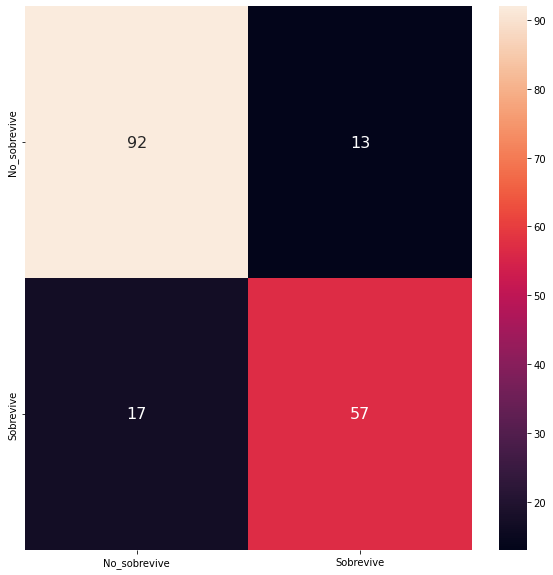

In [ ]:
cm=confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(cm,index=['No_sobrevive','Sobrevive'],columns = ['No_sobrevive','Sobrevive'])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g')